# License plate removal

In [156]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2

## 1. Read and grayscale the image

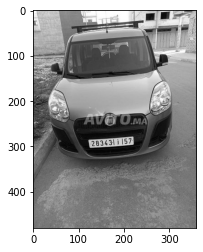

In [157]:
img = cv2.imread('../../../Downloads/car3.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

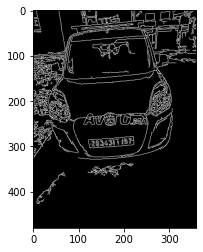

In [158]:
#Noise reduction
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
#Edge detection
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find and validate Contours

In [159]:
keypts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypts)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [160]:
locations = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        x,y,w,h = cv2.boundingRect(contour)
        # The w constrain to remove the vertical lines
        if w > 2 * h:
            locations.append(approx)

## 4. Show car plate

In [161]:
if (len(locations) > 0):
    plate = locations[0]
location

[array([[[220, 279]],
 
        [[121, 289]],
 
        [[125, 303]],
 
        [[216, 297]]], dtype=int32),
 array([[[221, 294]],
 
        [[126, 303]],
 
        [[121, 287]],
 
        [[218, 278]]], dtype=int32)]

In [162]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [plate], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

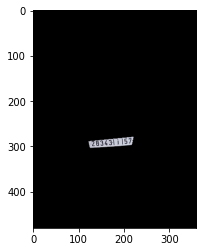

In [163]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## 5. Trait new plate

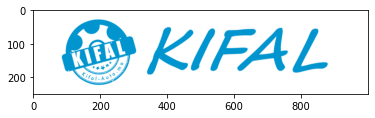

In [164]:
# plate
img_plate = cv2.imread('./static/plate.png')
plt.imshow(cv2.cvtColor(img_plate, cv2.COLOR_BGR2RGB))

pts_src = np.array([[img_plate.shape[1],0], [0,0],  [0, img_plate.shape[0]], [img_plate.shape[1], img_plate.shape[0]]])

# Calculate Homography
h, status = cv2.findHomography(pts_src, plate)

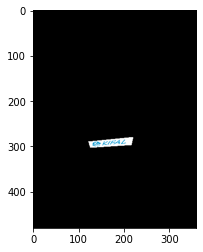

In [165]:
# Wrap the source
new_plate = cv2.warpPerspective(img_plate, h, (img.shape[1],img.shape[0]))
plt.imshow(cv2.cvtColor(new_plate, cv2.COLOR_BGR2RGB))

## 6. Put the new plate

In [166]:
# Now create a mask of logo and create its inverse mask also
new_plate_gray = cv2.cvtColor(new_plate, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(new_plate_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

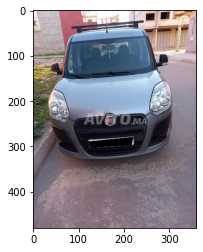

In [167]:
# Now black-out the area of the old plate
img_bo = cv2.bitwise_and(img ,img, mask=mask_inv)
plt.imshow(cv2.cvtColor(img_bo, cv2.COLOR_BGR2RGB))

In [168]:
# Merge the images
final = cv2.bitwise_or(img_bo, new_plate)

## FINAL RESULT

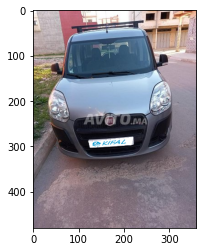

In [169]:
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))